
# LAB: Introducción al Clustering. K-Means Clustering 


# ![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_z4GT2bY3HmLtHlRmRVm1oygMgUUvz6o8ryX3vAMo65iIftAD) 

## Introducción

A esta altura ya sabemos lo que es un proceso de Clusterización, como preparar los datos para realizarlo y como evaluar el análisis de K-Means. Ahora es el momento de poner a prueba nuestras habilidades. Para esta sesión de laboratorio vamos a completar un proceso completo de K-Means usando Python.

Vamos a aplicar K-means al mismo dataset de dígitos de la clase pasada. La idea es tratar de identificar dígitos similares sin utilizar la información de la etiqueta oringinal. Esto podría ser similar a la extracción de información "nueva" de un dataset desconocido del cual no tenemos ninguna información previa.

Vamos a empezar cargando los datos de dígitos y estimando los clusters. Recordemos que el dataset consiste en 1797 muestras con 65 features (donde cada columna es el brillo de in pixel en una imagen 8x8).

### Ejercicio

### Requerimientos

- Importar los datos
- Realizar una proceso de K-Means para extraer información de los dígitos.
    - Usar Scikit-Learn
- Encontrar el "Silhouette Score" para elvaluar los cluster de análisis.


**Bonus:**
- Encontrar el k óptimo
- Encontrar los centroides. (Hint: Usar Scikit!)


### Fuentes adicionales

- Un link de [K-Means Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Sobre Silhouette Score [Silhouette Score Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

====================================================================================================================

## _COMENCEMOS!!!!_

**Sección I: Importar la Data**

Importar paquetes y leer el archivo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

¿Necesitamos normalizar? ¿Pueden tener escalas distintas los features que se usan para calcular distancias?

In [3]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#digits.data = scaler.fit_transform(digits.data)

In [4]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Veamos que los centros de los clusters tienen 65 dimensiones y podrían ser interpretados como un dígito "típico" dentro del cluster. Si los ploteamos...

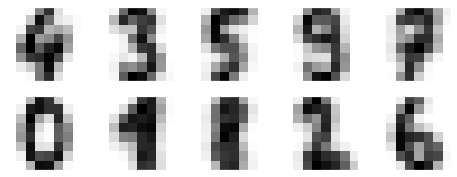

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Es muy interesante notar que aún sin las etiquetas el algoritmo parece poder encontrar clusters cuyos centros son dígitos reconocibles. Quizás el 1 y el 8 sean la excepción.

Dado que K-means no conoce nada acerca de la identidad del cluster. Las etiquetas 0-9 pueden estar permutadas. Podemos arreglar esto matcheando cada cluster aprendido con las verdaderas etiquetas.

In [6]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Ahora podemos chequear que tan preciso fue nuestro clustering no supervisado encontrando dígitos similares:

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Con solamente un algoritmo K-means y con un dataset de imágenes sin etiquetas logamos un accuracy de casi el 80%. Veamos ahora la matriz de confusión:

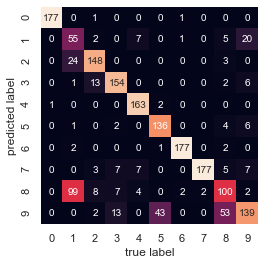

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

El mayor punto de confusión, como podemos ver es el de los 8 y los 1. Pero es interesante notar cómo solamente usando K-Means es posible construir un clasificador de dígitos bastante preciso sin información de las etiquetas.